In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Dataset/train'
valid_path = '/content/drive/MyDrive/Cotton Dataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Dataset/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 598s 10s/step - loss: 2.6829 - accuracy: 0.4065 - val_loss: 1.4156 - val_accuracy: 0.5755
Epoch 2/20
61/61 [==============================] - 373s 6s/step - loss: 0.9465 - accuracy: 0.6171 - val_loss: 0.8440 - val_accuracy: 0.6321
Epoch 3/20
61/61 [==============================] - 372s 6s/step - loss: 0.9352 - accuracy: 0.6366 - val_loss: 1.0319 - val_accuracy: 0.5755
Epoch 4/20
61/61 [==============================] - 362s 6s/step - loss: 0.9462 - accuracy: 0.6238 - val_loss: 1.0283 - val_accuracy: 0.6038
Epoch 5/20
61/61 [==============================] - 347s 6s/step - loss: 0.7713 - accuracy: 0.6889 - val_loss: 0.8667 - val_accuracy: 0.6321
Epoch 6/20
61/61 [==============================] - 346s 6s/step - loss: 0.8778 - accuracy: 0.6545 - val_loss: 0.7139 - val_accuracy: 0.6415
Epoch 7/20
61/61 [==============================] - 345s 6s/step - loss: 0.9882 - accuracy: 0.6448 - val_loss: 0.8277 - val_accuracy: 0.6509
Epoch 8/20
6

In [ ]:
import matplotlib.pyplot as plt

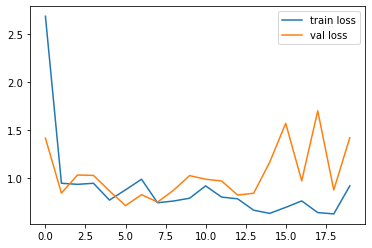

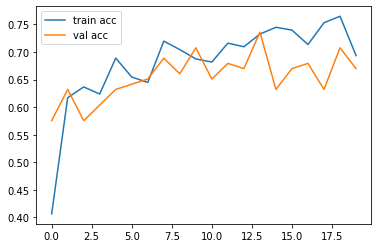

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Cotton Dataset/model_resnet.h5')

NameError: ignored

In [ ]:
import tensorflow as tf

# Create a model using low-level tf.* APIs
class Squared(tf.Module):
  @tf.function(input_signature=[tf.TensorSpec(shape=[224,224,3], dtype=tf.float32)])
  def __call__(self, x):
    return tf.square(x)
model = Squared()
# (ro run your model) result = Squared(5.0) # This prints "25.0"
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_tf_dir")
concrete_func = model.__call__.get_concrete_function()

# Convert the model.
# Notes that for the versions earlier than TensorFlow 2.7, the
# from_concrete_functions API is able to work when there is only the first
# argument given:
# > converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func],
                                                            '/content/drive/MyDrive/Cotton Dataset/resnet')
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model('/content/drive/MyDrive/Cotton Dataset/resnet')
tflite_model = tf_lite_converter.convert()

AttributeError: ignored

In [ ]:
import os

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
KERAS_MODEL_NAME = "/content/drive/MyDrive/Cotton Dataset/resnet/model_resnet.h5"

In [ ]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 95.08 Megabytes


In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpac86q1js/assets


INFO:tensorflow:Assets written to: /tmp/tmpac86q1js/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

652

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 0.637 Kilobytes


In [ ]:
import tensorflow as tf
# load mobilenet model of keras 
model = "/content/drive/MyDrive/Cotton Dataset/resnet/model_resnet.h5"

In [ ]:
#get callable graph from model. 
run_model = tf.function(lambda x: model(x))
# to get the concrete function from callable graph 
concrete_funct = run_model.get_concrete_function(tf.Tensorpec(model.inputs[0].shape, model.inputs[0].dtype))

#convert concrete function into TF Lite model using TFLiteConverter
converter =  tf.lite.TFLiteConverter.from_concrete_functions([concrete_funct])
tflite_model = converte.convert()
#save model 
tflite_model_files = pathlib.Path("/tmp/concretefunc_model.tflite")
tflite_model_file.write_bytes(tflite_model)

AttributeError: ignored

In [ ]:
import tensorflow.compat.v1 as tf1

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir= '/content/drive/MyDrive/Cotton Dataset/resnet')
tflite_model = converter.convert()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp0suse9wd/assets


INFO:tensorflow:Assets written to: /tmp/tmp0suse9wd/assets


In [ ]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpo8wvjk06/assets


INFO:tensorflow:Assets written to: /tmp/tmpo8wvjk06/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


NameError: ignored